# Gábriel Noel Nmar - Thesis

## Data importation

In [2]:
# Importing the necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

# Setting the display option to a wider scale
pd.set_option('display.width', 1000)

# Loading the dataset
df = pd.read_csv("MetroPT3(AirCompressor).csv")

# Viewing the first few rows of the dataset
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


## Data exploration

In [3]:
# Displaying the shape of the dataset
print("Dataset Shape:", df.shape)

# Displaying the columns of the dataset
print("\nColumns:", df.columns)

# Checking the data types of each column
print("\nData Types of each column:\n")
print(df.dtypes)

Dataset Shape: (1516948, 17)

Columns: Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'], dtype='object')

Data Types of each column:

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object


## Data cleaning, formatting and transormation

In [4]:
# Converting the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Checking the data types again to confirm the change
print(df.dtypes)

# Checking for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

Unnamed: 0                  int64
timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
dtype: object

Missing values in each column:

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


## Exploratory data analysis (EDA)

In [5]:
# Getting the first and last datetime values
first_datetime = df['timestamp'].min()
last_datetime = df['timestamp'].max()

# Printing the first and last datetime values
print("First date and time:", first_datetime)
print("Last date and time:", last_datetime)

First date and time: 2020-02-01 00:00:00
Last date and time: 2020-09-01 03:59:50


In [6]:
# Dropping the 'Unnamed: 0' column
df = df.drop(columns='Unnamed: 0')

# Viewing the first few rows of the new dataset
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [7]:
# Basic Statistical Summary
print("Statistical Summary:\n")
print(df.describe().T)

Statistical Summary:

                     count       mean       std     min     25%     50%      75%     max
TP2              1516948.0   1.367826  3.250930  -0.032  -0.014  -0.012  -0.0100  10.676
TP3              1516948.0   8.984611  0.639095   0.730   8.492   8.960   9.4920  10.302
H1               1516948.0   7.568155  3.333200  -0.036   8.254   8.784   9.3740  10.288
DV_pressure      1516948.0   0.055956  0.382402  -0.032  -0.022  -0.020  -0.0180   9.844
Reservoirs       1516948.0   8.985233  0.638307   0.712   8.494   8.960   9.4920  10.300
Oil_temperature  1516948.0  62.644182  6.516261  15.400  57.775  62.700  67.2500  89.050
Motor_current    1516948.0   2.050171  2.302053   0.020   0.040   0.045   3.8075   9.295
COMP             1516948.0   0.836957  0.369405   0.000   1.000   1.000   1.0000   1.000
DV_eletric       1516948.0   0.160611  0.367172   0.000   0.000   0.000   0.0000   1.000
Towers           1516948.0   0.919848  0.271528   0.000   1.000   1.000   1.0000   1.000

In [8]:
# Dropping the timestamp column
df_modified = df.drop(columns=['timestamp'])

styled_summary = df_modified.describe().transpose().style.format('{:.2f}')\
    .applymap(lambda x: 'font-weight: bold')\
    .set_table_styles([
        {'selector': 'thead th',
         'props': [('background-color', '#606060'), 
                   ('color', 'white'), 
                   ('text-align', 'center'), 
                   ('vertical-align', 'middle')]},
        {'selector': 'td',
         'props': [('text-align', 'center'), 
                   ('vertical-align', 'middle')]}
    ])\
    .set_properties(**{
        'background-color': '#f4f4f2',
        'color': 'black',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px'
    })

# Displaying the styled statistical summary
display(styled_summary)

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.00,1.37,3.25,-0.03,-0.01,-0.01,-0.01,10.68
TP3,1516948.00,8.98,0.64,0.73,8.49,8.96,9.49,10.30
H1,1516948.00,7.57,3.33,-0.04,8.25,8.78,9.37,10.29
DV_pressure,1516948.00,0.06,0.38,-0.03,-0.02,-0.02,-0.02,9.84
Reservoirs,1516948.00,8.99,0.64,0.71,8.49,8.96,9.49,10.30
Oil_temperature,1516948.00,62.64,6.52,15.40,57.78,62.70,67.25,89.05
Motor_current,1516948.00,2.05,2.30,0.02,0.04,0.04,3.81,9.29
COMP,1516948.00,0.84,0.37,0.00,1.00,1.00,1.00,1.00
DV_eletric,1516948.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Towers,1516948.00,0.92,0.27,0.00,1.00,1.00,1.00,1.00


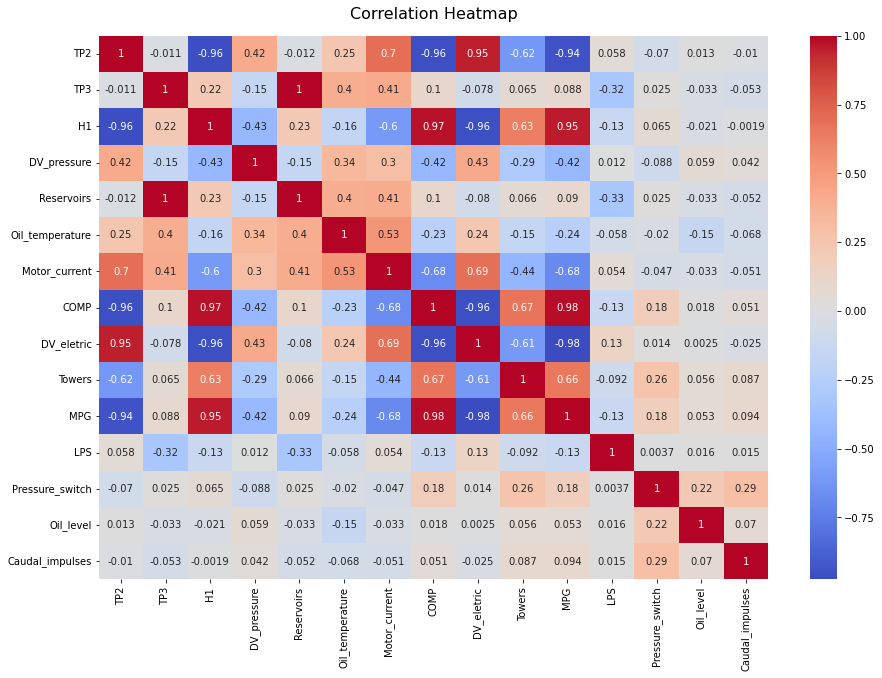

In [9]:
# Calculating the correlation matrix for the dataset
correlation_matrix = df.corr()

# Displaying the correlation matrix's heatmap
plt.figure(figsize=(15, 10))
plt.title('Correlation Heatmap',y=1.02, fontsize=16, ha='center')
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

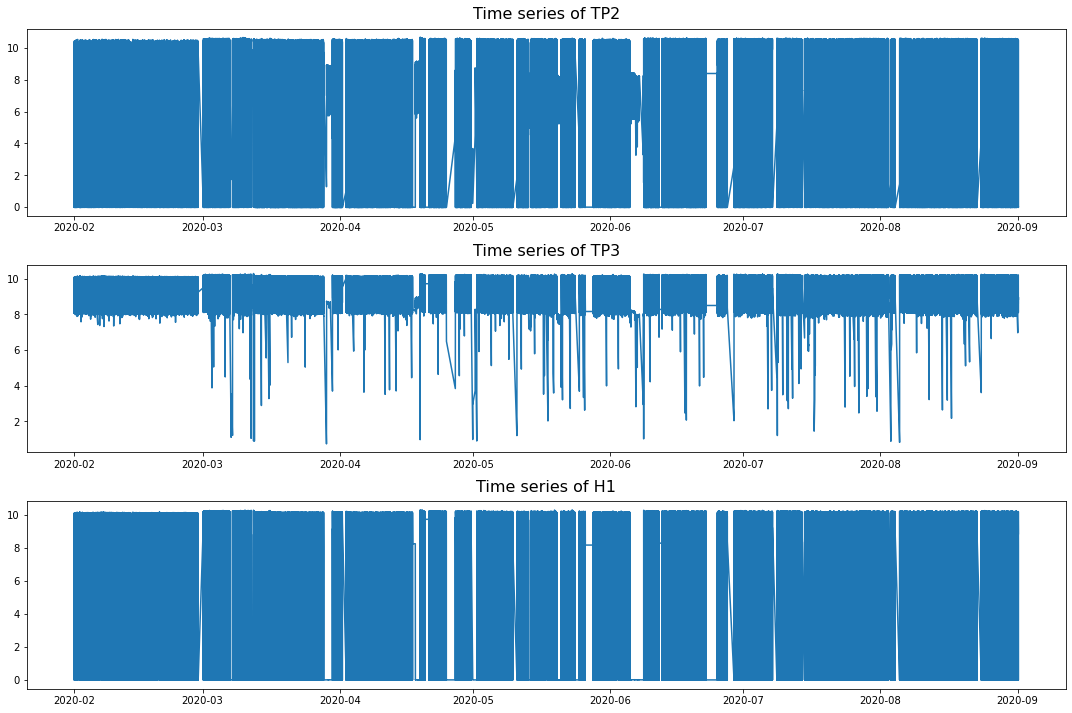

In [10]:
# Plotting the time series for 'TP2', 'TP3', and 'H1'
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['TP2'])
plt.title('Time series of TP2',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['TP3'])
plt.title('Time series of TP3',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['H1'])
plt.title('Time series of H1',y=1.02, fontsize=16, ha='center')

plt.tight_layout()
plt.show()

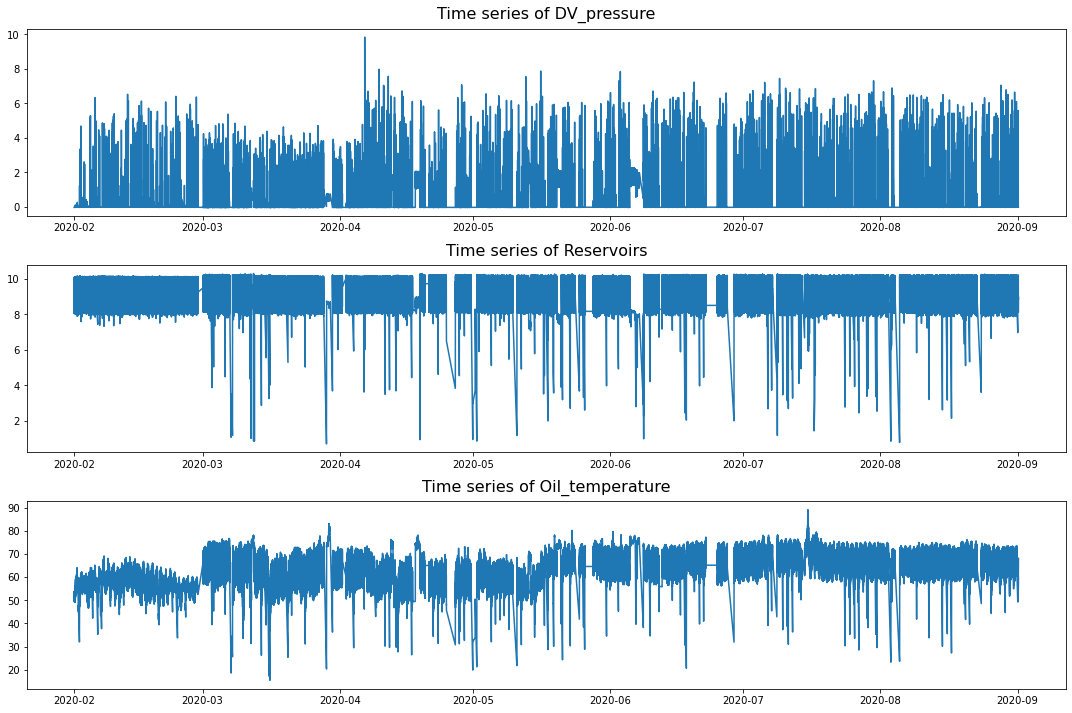

In [11]:
# Plotting the time series for 'DV_pressure', 'Reservoirs' and 'Oil_temperature'
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['DV_pressure'])
plt.title('Time series of DV_pressure',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['Reservoirs'])
plt.title('Time series of Reservoirs',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['Oil_temperature'])
plt.title('Time series of Oil_temperature',y=1.02, fontsize=16, ha='center')

plt.tight_layout()
plt.show()

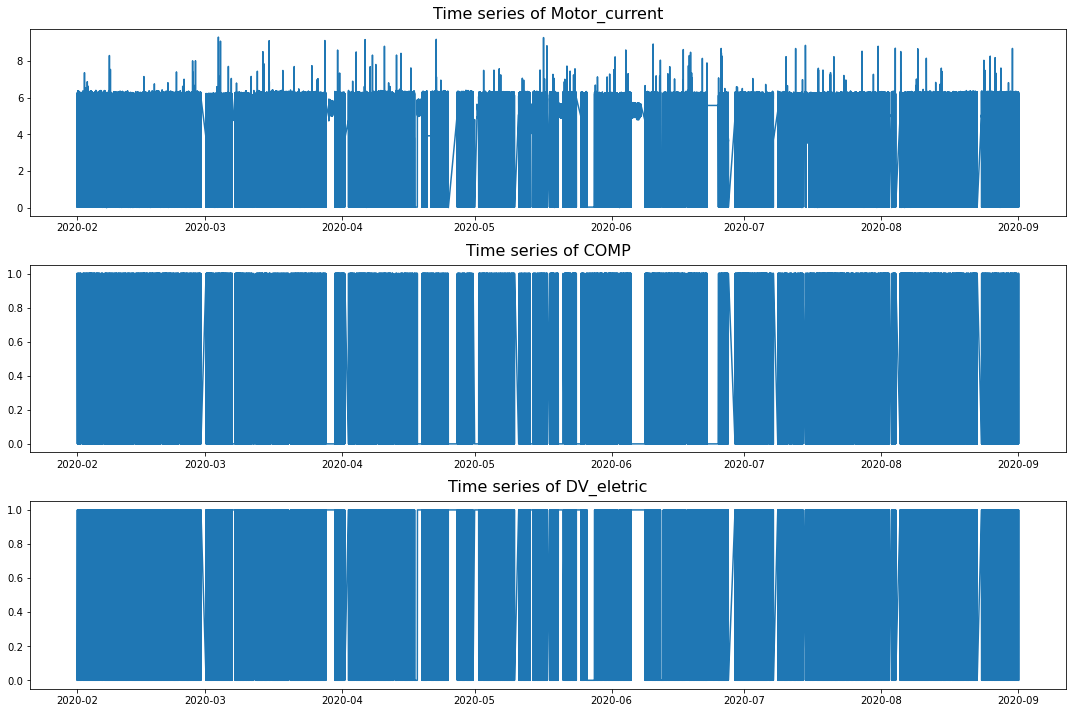

In [12]:
# Plotting the time series for 'Motor_current', 'COMP' and 'DV_eletric'
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['Motor_current'])
plt.title('Time series of Motor_current',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['COMP'])
plt.title('Time series of COMP',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['DV_eletric'])
plt.title('Time series of DV_eletric',y=1.02, fontsize=16, ha='center')

plt.tight_layout()
plt.show()

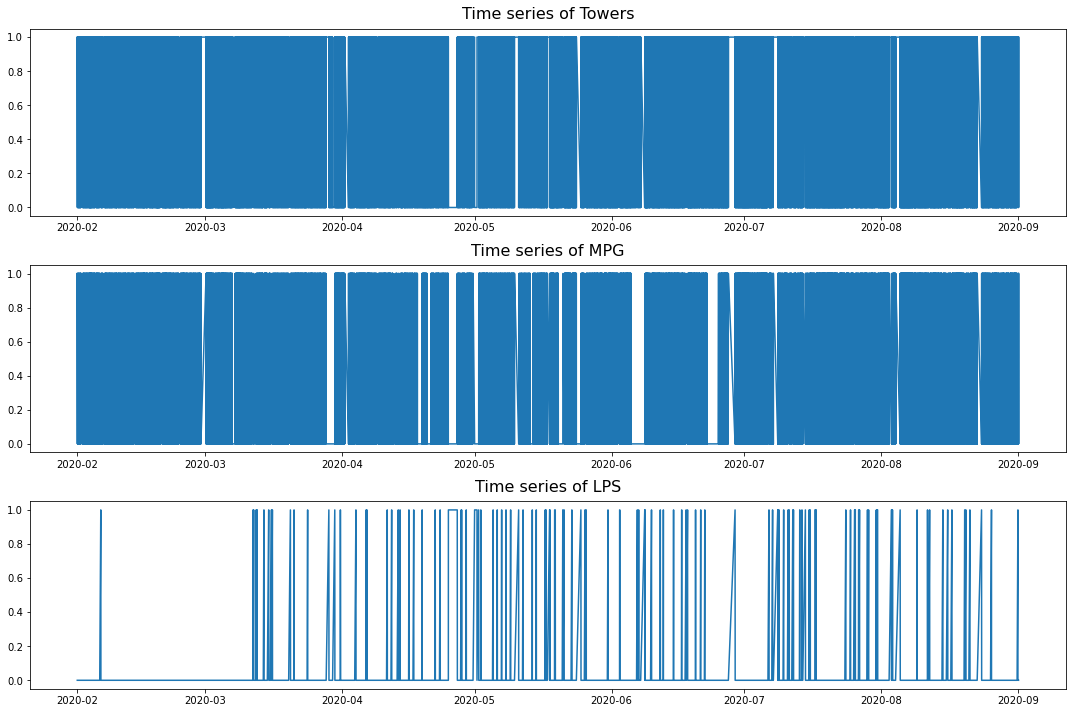

In [13]:
# Plotting the time series for 'Towers','MPG' and 'LPS'
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['Towers'])
plt.title('Time series of Towers',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['MPG'])
plt.title('Time series of MPG',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['LPS'])
plt.title('Time series of LPS',y=1.02, fontsize=16, ha='center')

plt.tight_layout()
plt.show()

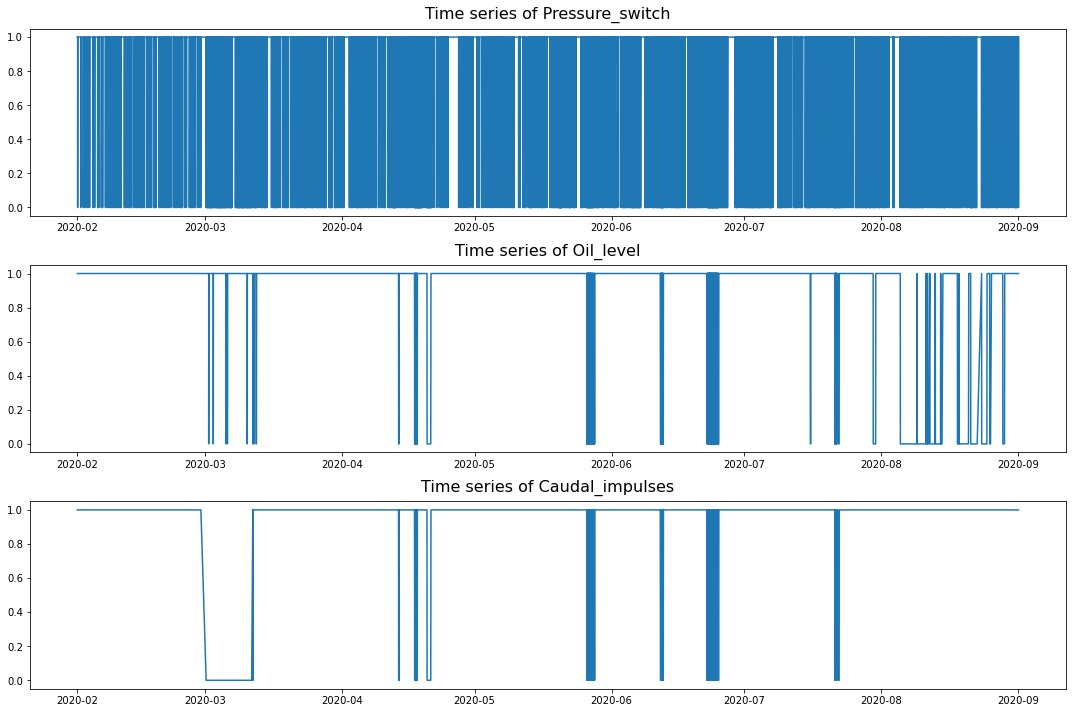

In [14]:
# Plotting the time series for 'Pressure_switch','Oil_level' and 'Caudal_impulses'
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['Pressure_switch'])
plt.title('Time series of Pressure_switch',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['Oil_level'])
plt.title('Time series of Oil_level',y=1.02, fontsize=16, ha='center')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['Caudal_impulses'])
plt.title('Time series of Caudal_impulses',y=1.02, fontsize=16, ha='center')

plt.tight_layout()
plt.show()

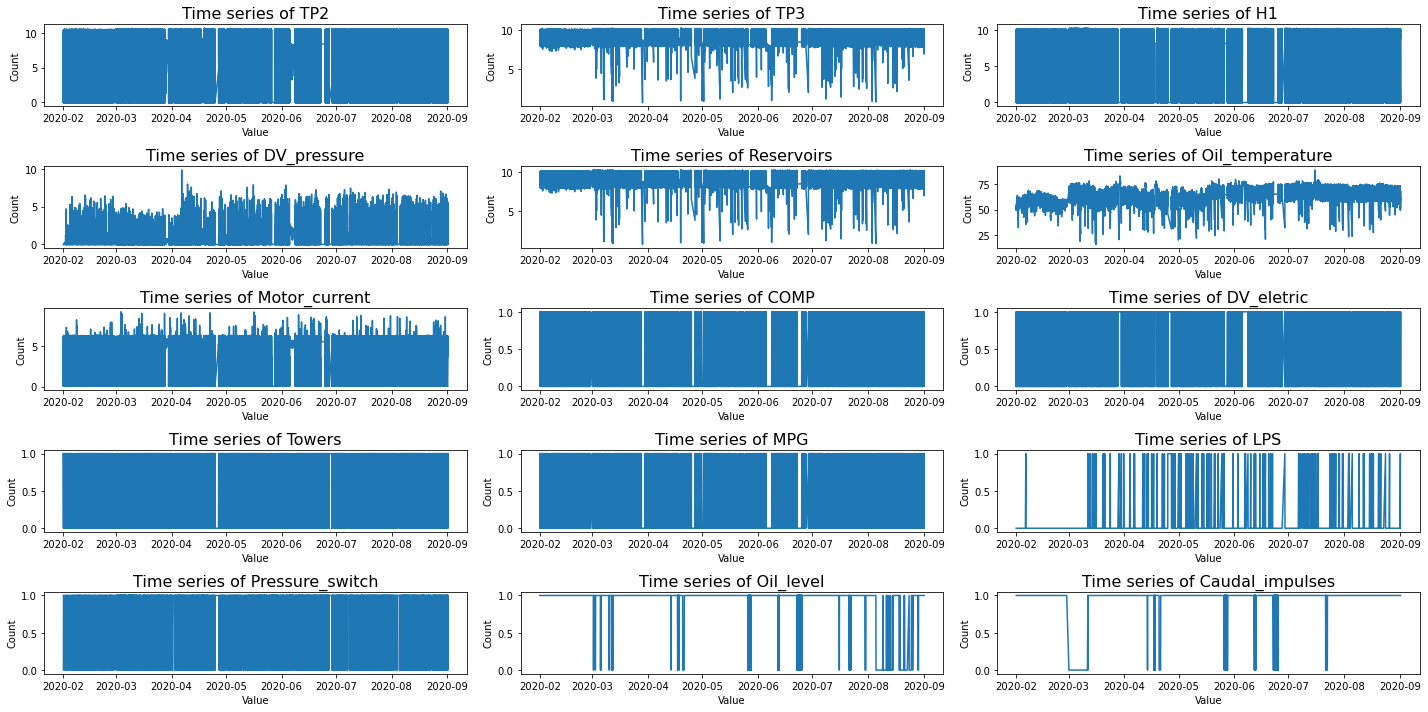

In [15]:
# Listing of all the attributes that are going to be displayed
attributes = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
              'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
              'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Setting the figure size so all plots share the same size
plt.figure(figsize=(20, 10))

# Looping through the list of attributes and creating subplots
for i, attribute in enumerate(attributes):
    ax = plt.subplot(5, 3, i+1)  
    ax.plot(df['timestamp'], df[attribute])
    ax.set_title(f'Time series of {attribute}', fontsize=16)
    ax.set_xlabel('Value')  
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

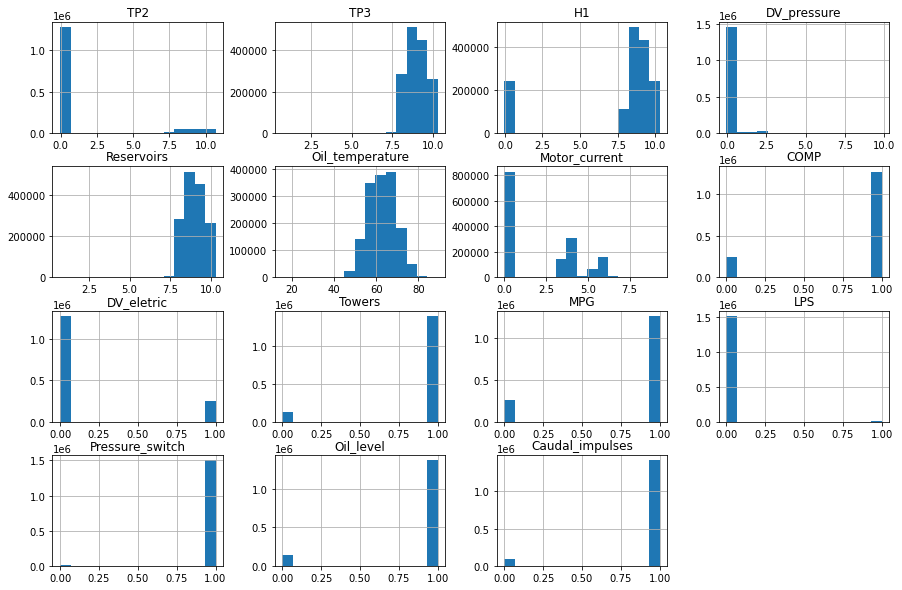

In [16]:
# Histograms for each numeric feature
numeric_columns = df.select_dtypes(include=['float64']).columns
df[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.show()

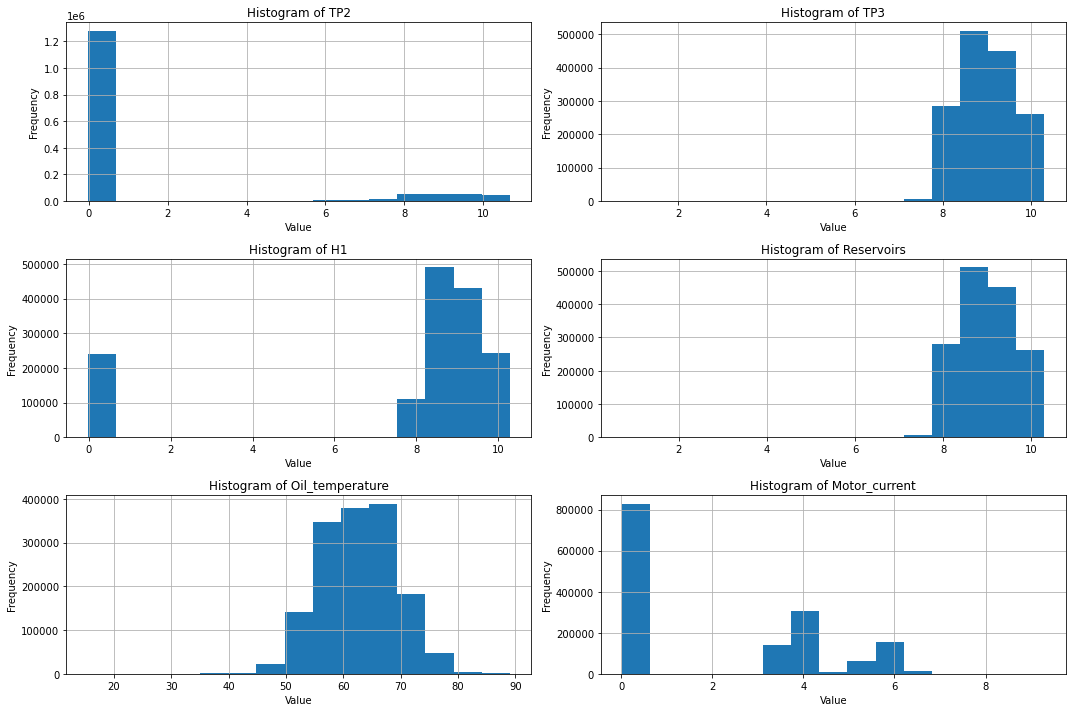

In [17]:
# Listing the specific numeric columns
specific_columns = ['TP2', 'TP3', 'H1', 'Reservoirs', 'Oil_temperature', 'Motor_current']

# Plotting the histograms 
axes = df[specific_columns].hist(bins=15, figsize=(15, 10))

# Iterating through axes to set x-labels, y-labels, and titles
for ax, column in zip(axes.flatten(), specific_columns):
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    
plt.tight_layout()
plt.show()

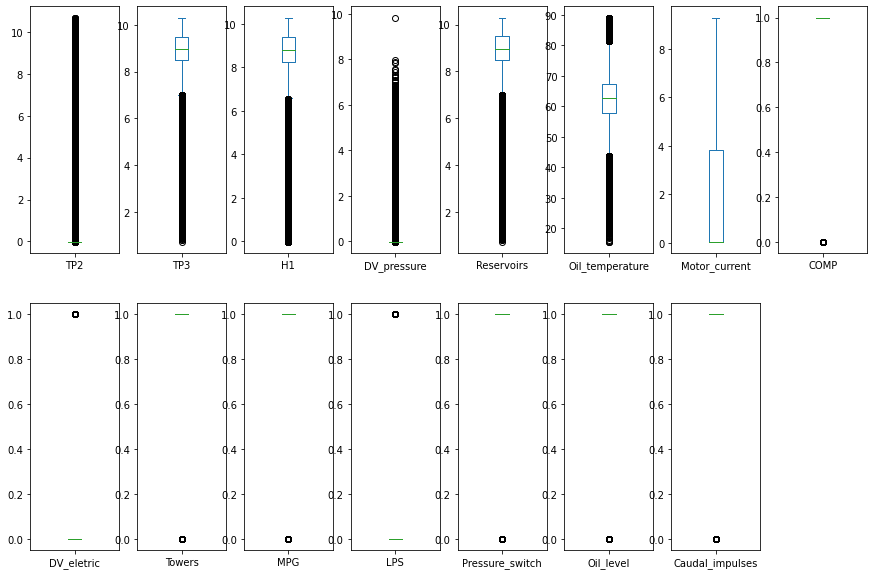

In [18]:
# Box-plots for each numeric feature
df[numeric_columns].plot(kind='box', subplots=True, layout=(2, -1), figsize=(15, 10))
plt.show()

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(


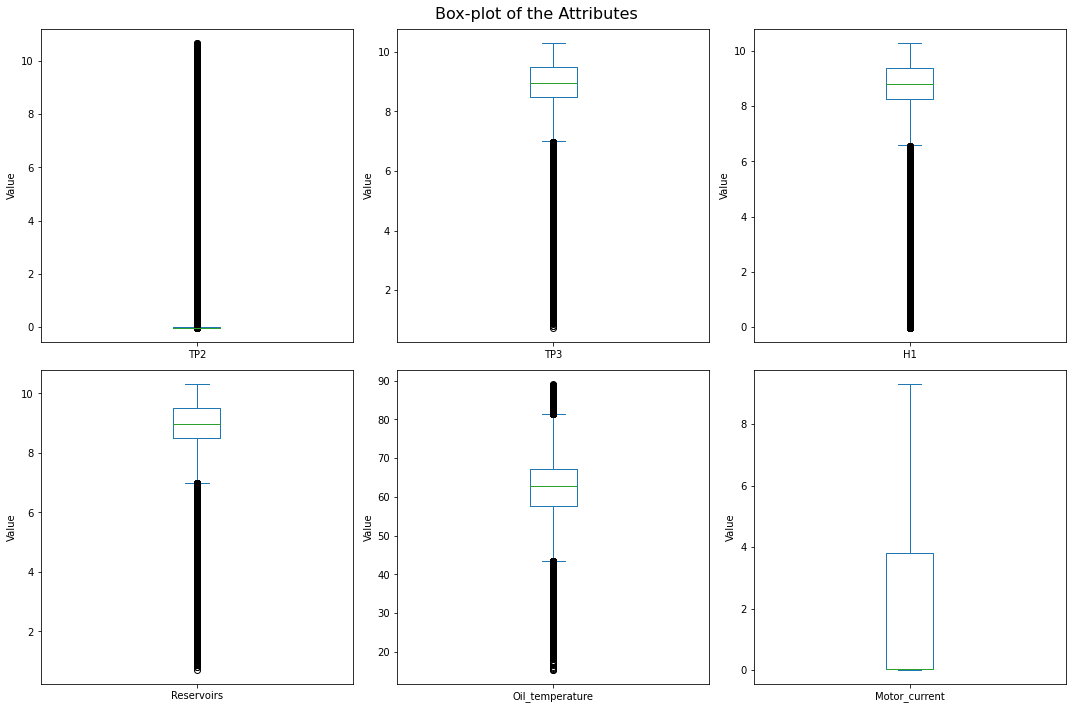

In [19]:
# Listing the specific numeric columns
specific_columns = ['TP2', 'TP3', 'H1', 'Reservoirs', 'Oil_temperature', 'Motor_current']

# Determining the layout based on the number of specific columns
num_columns = len(specific_columns)
num_rows = num_columns // 3 + (num_columns % 3 > 0) 

# Creating box plots for the specific columns with the specified layout
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))  
df[specific_columns].plot(kind='box', subplots=True, layout=(num_rows, 3), ax=axes)

# Adding a common title
fig.suptitle('Box-plot of the Attributes', fontsize=16)

# Adding y-labels to each subplot
for ax in axes.flatten():
    ax.set_ylabel('Value')

# Adjusting layout to make space for the common title
plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()

## Scatter plot

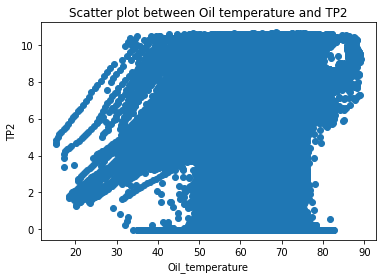

In [20]:
plt.scatter(df['Oil_temperature'], df['TP2'])
plt.xlabel('Oil_temperature')
plt.ylabel('TP2')
plt.title('Scatter plot between Oil temperature and TP2')
plt.show()

## Data labeling

In [21]:
failures = [
    {"start": "2020-04-18 00:00", "end": "2020-04-18 23:59"},  # Failure #1
    {"start": "2020-05-29 23:30", "end": "2020-05-30 06:00"},  # Failure #2
    {"start": "2020-06-05 10:00", "end": "2020-06-07 14:30"},  # Failure #3
    {"start": "2020-07-15 14:30", "end": "2020-07-15 19:00"}   # Failure #4
]

# Converting these times to pandas datetime for comparison
for failure in failures:
    failure["start"] = pd.to_datetime(failure["start"])
    failure["end"] = pd.to_datetime(failure["end"])

# Initializing a new column for labels
df['label'] = 0

# Looping over each failure event
for failure in failures:
    # Labeling the data points within the failure duration as 1
    df.loc[(df['timestamp'] >= failure["start"]) & (df['timestamp'] <= failure["end"]), 'label'] = 1

# Checking the distribution of labels
print(df['label'].value_counts())

# Displaying the first few rows to see the new label column
df.head()

0    1486994
1      29954
Name: label, dtype: int64


,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,label
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


## Model building

### Naive Bayes

In [22]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the model
gnb.fit(X_train_scaled, y_train)

# Making predictions
y_pred = gnb.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Naive Bayes Model Performance:
Accuracy: 0.907045936473406
Precision: 0.17684636958554067
Recall: 0.9958324193902172
F1 Score: 0.3003539413185141
Confusion Matrix:
 [[403703  42264]
 [    38   9080]]


### Logistic Regression

In [23]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Training the model
log_reg.fit(X_train_scaled, y_train)

# Making predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Model Performance:
Accuracy: 0.9777558038608172
Precision: 0.4737501958940605
Recall: 0.9946260144768589
F1 Score: 0.6418031916775768
Confusion Matrix:
 [[435893  10074]
 [    49   9069]]


### k-Nearest Neighbors 

In [24]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  

# Training the model
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("k-Nearest Neighbors Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

k-Nearest Neighbors Model Performance:
Accuracy: 0.9991605963721063
Precision: 0.9823321554770318
Recall: 0.9756525553849529
F1 Score: 0.9789809618135799
Confusion Matrix:
 [[445807    160]
 [   222   8896]]


### Decision Tree

In [25]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Decision Tree Model Performance:
Accuracy: 0.9992001494226354
Precision: 0.9806720843399956
Recall: 0.979381443298969
F1 Score: 0.9800263388937664
Confusion Matrix:
 [[445791    176]
 [   188   8930]]


### Random Forest

In [26]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1) 
y = df['label']

# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Creating a Random Forest Classifier
clf = RandomForestClassifier()

# Training the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Random Forest Classifier:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Random Forest Classifier:

Accuracy: 0.9994506520759858
Precision: 0.9852265265922522
Recall: 0.9873875849967098
F1 Score: 0.9863058720420683
Confusion Matrix:
 [[445832    135]
 [   115   9003]]


### Gradient Boosting Machine

In [27]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Gradient Boosting classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training the model
gbm.fit(X_train_scaled, y_train)

# Making predictions
y_pred = gbm.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Gradient Boosting Machine Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Gradient Boosting Machine Model Performance:
Accuracy: 0.9988331850093939
Precision: 0.9715540911587041
Recall: 0.9701688966878701
F1 Score: 0.9708609998353729
Confusion Matrix:
 [[445708    259]
 [   272   8846]]


### Histogram Gradient Boosting Classifier

In [28]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a HistGradientBoostingClassifier
hist_gb = HistGradientBoostingClassifier()

# Training the model
hist_gb.fit(X_train_scaled, y_train)

# Making predictions
y_pred = hist_gb.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("HistGradientBoostingClassifier Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

HistGradientBoostingClassifier Model Performance:
Accuracy: 0.9991034641880089
Precision: 0.9764770240700219
Recall: 0.9788330774292608
F1 Score: 0.9776536312849163
Confusion Matrix:
 [[445752    215]
 [   193   8925]]


### SVM

In [29]:
# Sampling a smaller subset of the data for faster training
subset_df = df.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Excluding 'timestamp' and separating features and target
X_subset = subset_df.drop(['label', 'timestamp'], axis=1)
y_subset = subset_df['label']

# Splitting the subset data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

# Standardizing the subset data
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_test_sub_scaled = scaler.transform(X_test_sub)

# Creating a LinearSVC classifier with adjusted parameters
linear_svc_sub = LinearSVC(C=1, tol=0.01, max_iter=10000, class_weight='balanced')

# Training the model on the subset
linear_svc_sub.fit(X_train_sub_scaled, y_train_sub)

# Making predictions
y_pred_sub = linear_svc_sub.predict(X_test_sub_scaled)

# Evaluating the model on the subset
accuracy_sub = accuracy_score(y_test_sub, y_pred_sub)
precision_sub = precision_score(y_test_sub, y_pred_sub, zero_division=0)
recall_sub = recall_score(y_test_sub, y_pred_sub, zero_division=0)
f1_sub = f1_score(y_test_sub, y_pred_sub, zero_division=0)
conf_matrix_sub = confusion_matrix(y_test_sub, y_pred_sub)

# Printing the metrics for the subset model
print("Adjusted SVM Model Performance on Subset:")
print("Accuracy:", accuracy_sub)
print("Precision:", precision_sub)
print("Recall:", recall_sub)
print("F1 Score:", f1_sub)
print("Confusion Matrix:\n", conf_matrix_sub)

Adjusted SVM Model Performance on Subset:
Accuracy: 0.9763343514469666
Precision: 0.4508700102354145
Recall: 0.9954802259887006
F1 Score: 0.6206410707995772
Confusion Matrix:
 [[43551  1073]
 [    4   881]]


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Neural Network Model

In [30]:
# Excluding 'timestamp' and separating features and target
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Multi-Layer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1)

# Training the model
mlp.fit(X_train_scaled, y_train)

# Making predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Neural Network (MLP) Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Neural Network (MLP) Model Performance:
Accuracy: 0.9982091257677137
Precision: 0.9470227199310864
Recall: 0.9645755648168458
F1 Score: 0.9557185547405597
Confusion Matrix:
 [[445475    492]
 [   323   8795]]


## Displaying the results

In [31]:
# Data for the models
data = {
    "Model": ["Naive Bayes", "Logistic Regression", "k-Nearest Neighbors", "Decision Tree", "Random Forest", "Gradient Boosting Machine", "Histogram Gradient Boosting Classifier", "SVM", "Neural Network (MLP)"],
    "Accuracy": [0.9070, 0.9778, 0.9992, 0.9991, 0.9995, 0.9988, 0.9991, 0.9763, 0.9982],
    "Precision": [0.1768, 0.4738, 0.9823, 0.9797, 0.9852, 0.9716, 0.9768, 0.4509, 0.9470],
    "Recall": [0.9958, 0.9946, 0.9757, 0.9776, 0.9878, 0.9702, 0.9793, 0.9955, 0.9646],
    "F1 Score": [0.3004, 0.6418, 0.9790, 0.9786, 0.9865, 0.9709, 0.9780, 0.6206, 0.9557]
}

# Creating a DataFrame
results_df = pd.DataFrame(data)

# Styling the DataFrame
styled_df = results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1 Score': '{:.4f}'
}).applymap(lambda x: 'font-weight: bold', subset=['Model'])\
.set_table_styles([
    {'selector': 'thead th',
     'props': [('background-color', '#606060'), 
               ('color', 'white'), 
               ('text-align', 'center'), 
               ('vertical-align', 'middle')]},
    {'selector': 'td',
     'props': [('text-align', 'center'), 
               ('vertical-align', 'middle')]}
]).set_properties(**{
    'background-color': '#f4f4f2',
    'color': 'black',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px'
}).hide(axis='index')

# Displaying the styled DataFrame
display(styled_df)

Model,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.9070,0.1768,0.9958,0.3004
Logistic Regression,0.9778,0.4738,0.9946,0.6418
k-Nearest Neighbors,0.9992,0.9823,0.9757,0.9790
Decision Tree,0.9991,0.9797,0.9776,0.9786
Random Forest,0.9995,0.9852,0.9878,0.9865
Gradient Boosting Machine,0.9988,0.9716,0.9702,0.9709
Histogram Gradient Boosting Classifier,0.9991,0.9768,0.9793,0.9780
SVM,0.9763,0.4509,0.9955,0.6206
Neural Network (MLP),0.9982,0.9470,0.9646,0.9557


In [32]:
# Data for the selected models
data = {
    "Model": ["Naive Bayes", "k-Nearest Neighbors", "Random Forest", "Gradient Boosting Machine"],
    "Accuracy": [0.9070, 0.9992, 0.9995, 0.9988],
    "Precision": [0.1768, 0.9823, 0.9859, 0.9716],
    "Recall": [0.9958, 0.9757, 0.9871, 0.9702],
    "F1 Score": [0.3004, 0.9790, 0.9865, 0.9709]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Styling the DataFrame
styled_df = results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1 Score': '{:.4f}'
}).applymap(lambda x: 'font-weight: bold', subset=['Model'])\
.set_table_styles([
    {'selector': 'thead th',
     'props': [('background-color', '#606060'), 
               ('color', 'white'), 
               ('text-align', 'center'), 
               ('vertical-align', 'middle')]},
    {'selector': 'td',
     'props': [('text-align', 'center'), 
               ('vertical-align', 'middle')]}
]).set_properties(**{
    'background-color': '#f4f4f2',
    'color': 'black',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px'
}).hide(axis='index')

styled_df

Model,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.9070,0.1768,0.9958,0.3004
k-Nearest Neighbors,0.9992,0.9823,0.9757,0.9790
Random Forest,0.9995,0.9859,0.9871,0.9865
Gradient Boosting Machine,0.9988,0.9716,0.9702,0.9709
